In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

File Upload

To access data set in Google Collaborate:

1.   Run 2nd code block (right below these instructions)
2.   Open the google link that appears in your browser
3.   Allow Access to Google Cloud SDK
4.   Copy the code
5.   Go back to the notebook and paste it in 'Verification Code'
6.   Hit enter
7.   To see the data set, click on the link in the next code block

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/open?id=1c5yu4aFYSqIiVLJRkCLHl7M2nPL1de2X'

In [ ]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1c5yu4aFYSqIiVLJRkCLHl7M2nPL1de2X


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('potential-impacts-world-food-supply.xls')  
climate_data = pd.read_excel('potential-impacts-world-food-supply.xls', sheet_name='data')
scenario_codes = pd.read_excel('potential-impacts-world-food-supply.xls', sheet_name='Scenario Codes')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
climate_data.head()

,File Code,BLS Code,BLS Region,BLS Region 2,Scenario Code,Scenario,Time_Slice,CO2 effects,CO2 ppm,Adapt- ation,wheat,rice,coarse grains,protein feed,Unnamed: 14,grains,four commo-dities
0,1,9,Argentina,Argentina,1,GISS,Equilibrium,No,330,No,-46,-46,-17,-17,NaN,-36.333333,-31.50
1,1,9,Argentina,Argentina,2,GISS,Equilibrium,Yes,555,No,-34,-35,-13,0,NaN,-27.333333,-20.50
2,1,9,Argentina,Argentina,3,GISS,Equilibrium,Yes,555,Level 1,-15,-15,0,17,NaN,-10.000000,-3.25
3,1,9,Argentina,Argentina,4,GISS,Equilibrium,Yes,555,Level 2,0,0,0,17,NaN,0.000000,4.25
4,1,9,Argentina,Argentina,5,GFDL,Equilibrium,No,330,No,-43,-43,-28,-28,NaN,-38.000000,-35.50


In [ ]:
scenario_codes.head()

,Scenario Code,Scenario,Time_Slice,CO2 effects,CO2 ppm,Adaptation,Unnamed: 6
0,1,GISS,Equilibrium,No,330,No,NaN
1,2,GISS,Equilibrium,Yes,555,No,NaN
2,3,GISS,Equilibrium,Yes,555,Level 1,NaN
3,4,GISS,Equilibrium,Yes,555,Level 2,NaN
4,5,GFDL,Equilibrium,No,330,No,NaN


In [ ]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   File Code          1088 non-null   int64  
 1   BLS Code           1088 non-null   int64  
 2   BLS Region         1088 non-null   object 
 3   BLS Region 2       1088 non-null   object 
 4   Scenario Code      1088 non-null   int64  
 5   Scenario           1088 non-null   object 
 6   Time_Slice         1088 non-null   object 
 7   CO2 effects        1088 non-null   object 
 8   CO2 ppm            1088 non-null   int64  
 9   Adapt- ation       1088 non-null   object 
 10  wheat              1088 non-null   int64  
 11  rice               1088 non-null   int64  
 12  coarse grains      1088 non-null   int64  
 13  protein feed       1088 non-null   int64  
 14  Unnamed: 14        0 non-null      float64
 15  grains             1088 non-null   float64
 16  four commo-dities  1088 

In [ ]:
climate_data.describe()

,File Code,BLS Code,Scenario Code,CO2 ppm,wheat,rice,coarse grains,protein feed,Unnamed: 14,grains,four commo-dities
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,0.0,1088.000000,1088.000000
mean,16.500000,479.437500,25.264706,453.441176,-10.056066,-10.006434,-11.458640,-5.479779,NaN,-10.507047,-9.250230
std,9.237339,396.618146,14.916997,115.364676,14.767115,13.092585,12.000465,13.624331,NaN,12.616622,12.468463
min,1.000000,9.000000,1.000000,330.000000,-73.000000,-73.000000,-68.000000,-58.000000,NaN,-71.333333,-68.000000
25%,8.750000,107.750000,9.000000,330.000000,-17.000000,-15.000000,-18.000000,-13.000000,NaN,-16.666667,-15.250000
50%,16.500000,227.000000,29.500000,466.500000,-7.000000,-7.000000,-10.000000,-5.000000,NaN,-7.666667,-6.875000
75%,24.250000,905.250000,38.000000,555.000000,0.000000,-1.000000,-3.000000,3.000000,NaN,-2.000000,-1.000000
max,32.000000,913.000000,46.000000,712.000000,31.000000,30.000000,25.000000,32.000000,NaN,27.666667,28.750000


In [ ]:
climate_data.corr()

Data Exploration

In [ ]:
climate_data['avg_crop'] = climate_data[['wheat','rice','coarse grains','protein feed','grains','four commo-dities']].mean(axis=1)
climate_data.head()

,File Code,BLS Code,BLS Region,BLS Region 2,Scenario Code,Scenario,Time_Slice,CO2 effects,CO2 ppm,Adapt- ation,wheat,rice,coarse grains,protein feed,Unnamed: 14,grains,four commo-dities,avg_crop
0,1,9,Argentina,Argentina,1,GISS,Equilibrium,No,330,No,-46,-46,-17,-17,NaN,-36.333333,-31.50,-32.305556
1,1,9,Argentina,Argentina,2,GISS,Equilibrium,Yes,555,No,-34,-35,-13,0,NaN,-27.333333,-20.50,-21.638889
2,1,9,Argentina,Argentina,3,GISS,Equilibrium,Yes,555,Level 1,-15,-15,0,17,NaN,-10.000000,-3.25,-4.375000
3,1,9,Argentina,Argentina,4,GISS,Equilibrium,Yes,555,Level 2,0,0,0,17,NaN,0.000000,4.25,3.541667
4,1,9,Argentina,Argentina,5,GFDL,Equilibrium,No,330,No,-43,-43,-28,-28,NaN,-38.000000,-35.50,-35.916667


AxesSubplot(0.125,0.125;0.775x0.755)


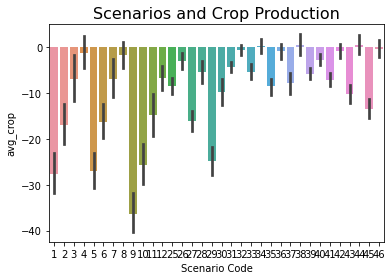

In [ ]:
import seaborn as sns
graph = sns.barplot(x="Scenario Code", y="avg_crop", data = climate_data)
title = "Scenarios and Crop Production"
graph.set_title(title, size = 16)
#graph.set_xticklabels(labels = climate_data['Scenario code'], font_size = 5)
#graph.set_xlabel("Education", size = 16)
#graph.set_ylabel("Yearly Wage", size = 16)
print(graph)

Text(0.5, 1.0, 'Scenarios and Crop Production')

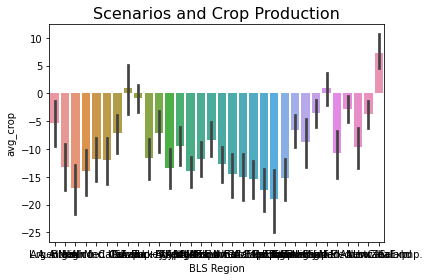

In [ ]:
#visualization of the CM3A cenario with co2 effects and level 1
cm3a = climate_data.loc[(climate_data['Scenario Code'] == 26) | 
                        (climate_data['Scenario Code'] == 28) |
                        (climate_data['Scenario Code'] == 30)] 

graph = sns.barplot(x="Region", y="avg_crop", data = cm3a)
title = "Scenarios and Crop Production"
graph.set_title(title, size = 16)

